# Part 3: Data Pre-processing

In [35]:
import numpy as np, matplotlib.pyplot as plt
from pathlib import Path

DATA = Path("../data")
RESULTS = Path("../results/q3")
RESULTS.mkdir(parents=True, exist_ok=True)

### Feature Generation

In [36]:
def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(
        signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

In [37]:
# Total length of the signal
signal_length = 100
# No. of non-zero elements in the signal
num_nonzero = 10

# Enter your index no without english letters and without leading zeros
INDEX_NO = 220071

sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (INDEX_NO % 10) * 2 + 10
if INDEX_NO % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30
sparse_signal = sparse_signal / 5

epsilon = np.random.normal(0, 15, signal_length)

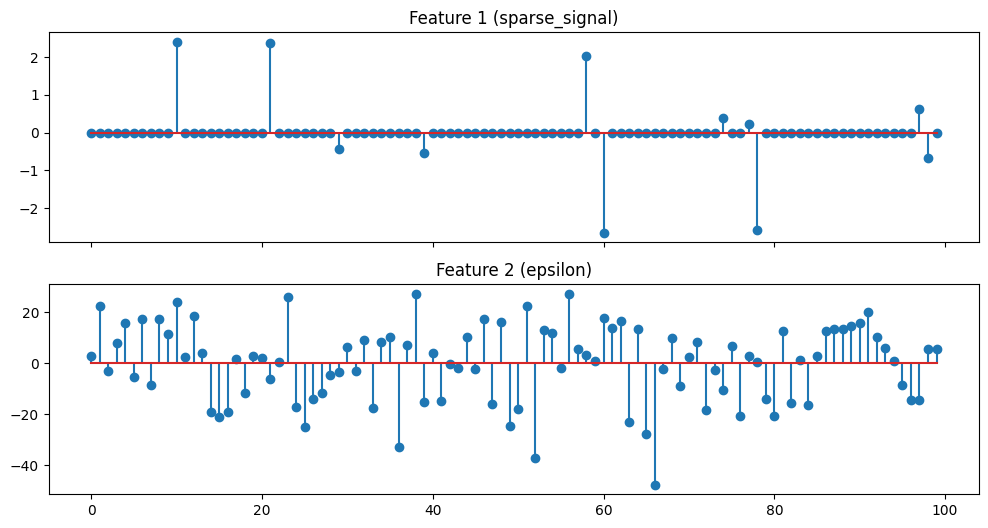

In [38]:
# Plot raw features
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
ax[0].stem(np.arange(signal_length), sparse_signal)
ax[0].set_title('Feature 1 (sparse_signal)')
ax[1].stem(np.arange(signal_length), epsilon)
ax[1].set_title('Feature 2 (epsilon)')
plt.savefig(RESULTS/"generated_features.png", dpi=150)
plt.show()

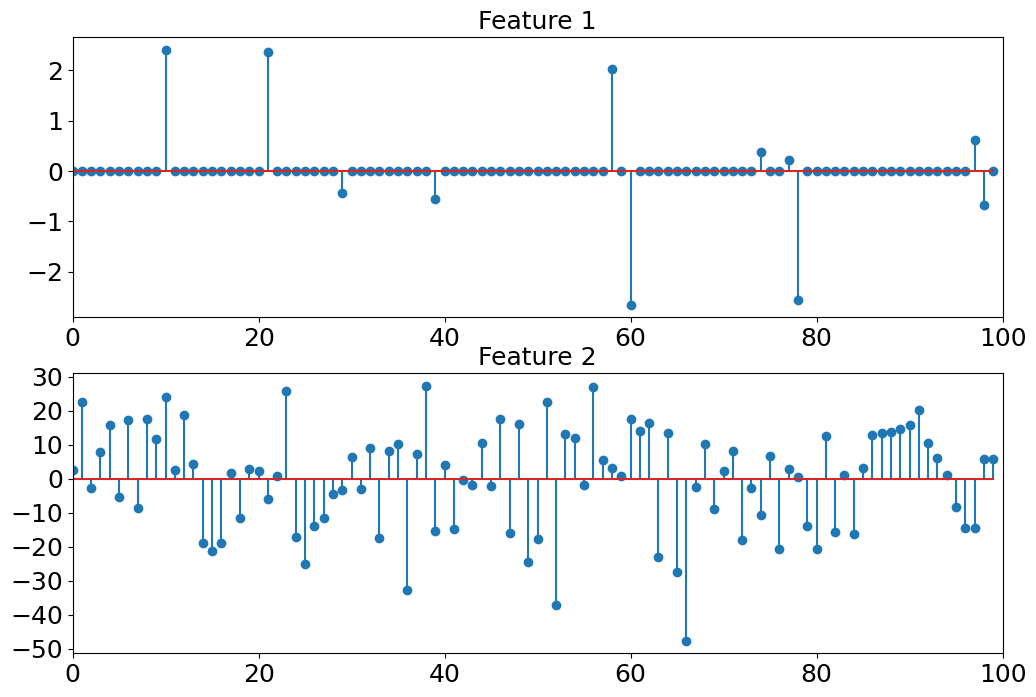

In [39]:
# epsilon = epsilon [: , np . newaxis ]
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18)  # Adjust x - axis tick label font size
plt.yticks(fontsize=18)
plt.stem(sparse_signal)
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18)  # Adjust x - axis tick label font size
plt.yticks(fontsize=18)
# plt.savefig(RESULTS/"generated_features.png", dpi=150)
plt.show()

### Defining Different Scaling Functions

In [40]:
def standard_scale(x):
    mu, sigma = np.mean(x), np.std(x)
    sigma = sigma if sigma > 0 else 1.0
    return (x - mu) / sigma


def minmax_scale(x):
    xmin, xmax = np.min(x), np.max(x)
    rng = xmax - xmin if xmax > xmin else 1.0
    return (x - xmin) / rng


def maxabs_scale(x):
    m = np.max(np.abs(x))
    m = m if m > 0 else 1.0
    return x / m

In [41]:
scalers = {
    "Standard": standard_scale,
    "MinMax": minmax_scale,
    "MaxAbs": maxabs_scale
}

features = {
    "Feature 1 (sparse)": sparse_signal,
    "Feature 2 (noise)": epsilon
}

### Visualizing the Results

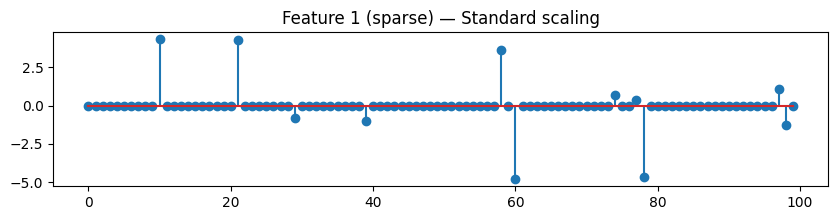

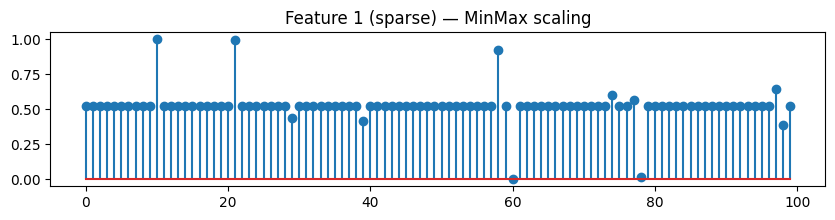

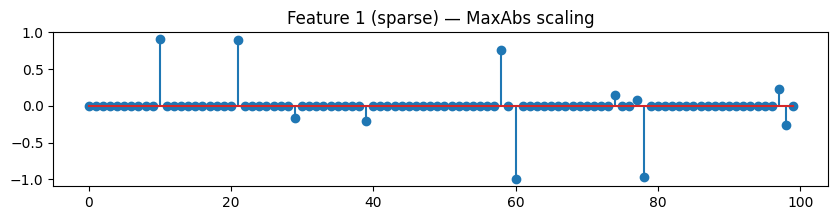

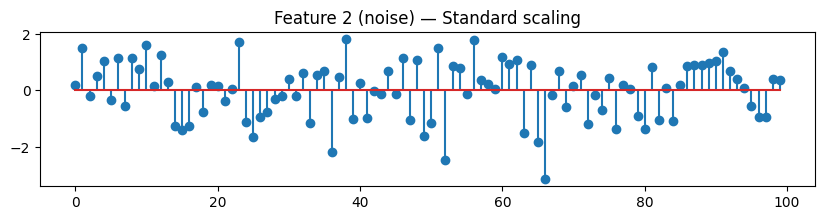

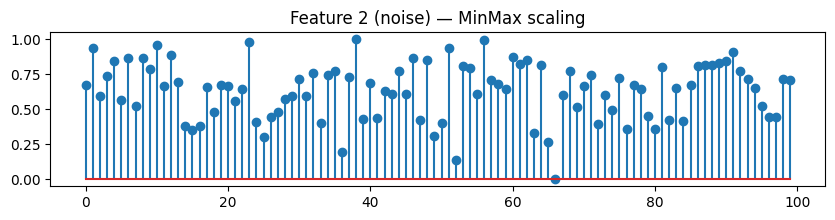

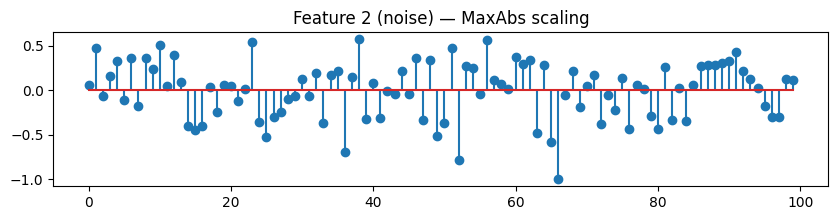

In [42]:
# Apply and visualize all scalers per feature
for fname, fvals in features.items():
    for sname, sfunc in scalers.items():
        scaled = sfunc(fvals)
        fig, ax = plt.subplots(figsize=(10, 2))
        ax.stem(scaled)
        ax.set_title(f"{fname} — {sname} scaling")
        plt.savefig(RESULTS/f"generated_features_{fname}_{sname}.png", dpi=150)
        plt.show()